In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/itsaman08/Best-Add-Predictor/main/Ads_CTR_Optimisation.csv")
dataset.head(20)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [3]:
#Implement UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0] *d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(numbers_of_selections[i] > 0):
            average_reward = sum_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
            
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] +=1
    reward = dataset.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

Text(0, 0.5, 'No of Times each Ad was Selected')

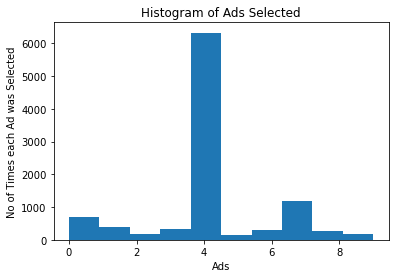

In [4]:
#Visualize the Result
plt.hist(ads_selected)
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("No of Times each Ad was Selected")